# Análisis de Datos de Base de Datos Oncológica

Este notebook contiene un análisis exploratorio de la base de datos oncológica, incluyendo:
- Estructura de las tablas
- Análisis de valores únicos y distribuciones
- Visualización de datos relevantes
- Relaciones entre tablas

In [1]:
# Importar las bibliotecas necesarias
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# Configuración de visualización
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## Conexión a la Base de Datos

Primero establecemos la conexión a la base de datos SQLite. Usamos la misma ruta que en nuestro programa principal.

In [24]:
# Establecer la conexión a la base de datos
import os
import glob

# Posibles rutas a probar
posibles_rutas = [
    "sqlite-analyzer\\src\\db\\database.sqlite3.db",
    "..\\db\\database.sqlite3.db",
    "db\\database.sqlite3.db",
    "database.sqlite3.db",
    os.path.join(os.getcwd(), "db", "database.sqlite3.db"),
    os.path.join(os.path.dirname(os.getcwd()), "db", "database.sqlite3.db")
]

# Imprimir directorio actual para referencia
current_dir = os.getcwd()
print(f"Directorio actual: {current_dir}")

# Buscar archivos SQLite en el directorio actual y subdirectorios
print("Buscando bases de datos SQLite en el directorio actual y subdirectorios...")
sqlite_files = glob.glob("**/*.db", recursive=True) + glob.glob("**/*.sqlite", recursive=True) + glob.glob("**/*.sqlite3", recursive=True)

if sqlite_files:
    print("Archivos SQLite encontrados:")
    for i, file in enumerate(sqlite_files, 1):
        print(f"{i}. {file}")
else:
    print("No se encontraron archivos SQLite (.db, .sqlite, .sqlite3) en el directorio actual y subdirectorios")

# Probar cada una de las posibles rutas
archivo_encontrado = False
database = None

print("\nProbando posibles rutas para la base de datos:")
for ruta in posibles_rutas:
    print(f"Intentando con: {ruta}")
    if os.path.isfile(ruta):
        archivo_encontrado = True
        database = ruta
        print(f"¡Encontrada! La base de datos existe en: {ruta}")
        break

# Si no se encuentra con las rutas predefinidas, permitir entrada manual
if not archivo_encontrado:
    print("\nNo se pudo encontrar la base de datos en ninguna de las rutas predefinidas.")
    if sqlite_files:
        print("Seleccionando la primera base de datos SQLite encontrada...")
        database = sqlite_files[0]
        archivo_encontrado = True
        print(f"Se utilizará: {database}")

# Intentar conectarse a la base de datos
if archivo_encontrado:
    try:
        conn = sqlite3.connect(database)
        print(f"\nConexión establecida con éxito a: {database}")
        
        # Mostrar información sobre la conexión
        cursor = conn.cursor()
        cursor.execute("PRAGMA database_list")
        db_info = cursor.fetchall()
        print(f"Información de la base de datos: {db_info}")
        
    except sqlite3.Error as e:
        print(f"Error al conectar a la base de datos: {e}")
        print("Por favor, proporciona la ruta completa manualmente en la siguiente celda.")
        conn = None
else:
    print("No se encontró ninguna base de datos. Por favor, proporciona la ruta completa manualmente en la siguiente celda.")
    conn = None

Directorio actual: c:\Users\cpascual\PycharmProjects\pythonProject\cursos_actividades\sina\sqlite-analyzer\src
Buscando bases de datos SQLite en el directorio actual y subdirectorios...
Archivos SQLite encontrados:
1. db\database.sqlite3.db

Probando posibles rutas para la base de datos:
Intentando con: sqlite-analyzer\src\db\database.sqlite3.db
Intentando con: ..\db\database.sqlite3.db
Intentando con: db\database.sqlite3.db
¡Encontrada! La base de datos existe en: db\database.sqlite3.db

Conexión establecida con éxito a: db\database.sqlite3.db
Información de la base de datos: [(0, 'main', 'c:\\Users\\cpascual\\PycharmProjects\\pythonProject\\cursos_actividades\\sina\\sqlite-analyzer\\src\\db\\database.sqlite3.db')]


## Especificar Ruta Manualmente

Si la conexión automática a la base de datos falló, utiliza esta celda para proporcionar la ruta completa a la base de datos.

In [25]:
# Usar esta celda solo si la conexión automática falló
if 'conn' not in locals() or conn is None:
    # Especifica la ruta completa a la base de datos
    ruta_manual = r"C:\Users\cpascual\PycharmProjects\pythonProject\cursos_actividades\sina\sqlite-analyzer\src\db\database.sqlite3.db"  # Modifica esta ruta
    
    if os.path.isfile(ruta_manual):
        try:
            conn = sqlite3.connect(ruta_manual)
            print(f"Conexión establecida con éxito a: {ruta_manual}")
        except sqlite3.Error as e:
            print(f"Error al conectar a la base de datos: {e}")
    else:
        print(f"Error: El archivo no existe en la ruta: {ruta_manual}")
else:
    print("Ya existe una conexión a la base de datos. Esta celda se ha saltado.")

Ya existe una conexión a la base de datos. Esta celda se ha saltado.


## Obtener la Lista de Tablas

Vamos a listar todas las tablas disponibles en la base de datos

In [26]:
# Obtener la lista de tablas
def get_tables(conn):
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    tables = cursor.fetchall()
    return [table[0] for table in tables]

tables = get_tables(conn)
print(f"La base de datos contiene {len(tables)} tablas:")
for i, table in enumerate(tables, 1):
    print(f"{i}. {table}")

La base de datos contiene 236 tablas:
1. ACCI_PATIENT_CONDITIONS
2. ACCI_VEHICLE_TYPES
3. ACCI_WORKER_TYPES
4. ACTI_ACTIVITY_STATES
5. ALLE_ALLERGY_CATEGORIES
6. ALLE_ALLERGY_END_REASONS
7. ALLE_ALLERGY_RESULTS
8. ALLE_ALLERGY_SEVERITY_LEVELS
9. ALLE_ALLERGY_TYPES
10. ALLE_INTOLERANCES
11. ALLE_L2_NOT_MED_ALLERGENS
12. ALLE_NOT_MEDICINAL_ALLERGENS
13. ALLE_UNKNOWN_REASONS
14. APPO_ABSENT_REASONS
15. APPO_ADMISSION_PREFERENCES
16. APPO_ADMISSION_TYPES
17. APPO_AMBI_STATES
18. APPO_APPOINTMENTS
19. APPO_APPOINTMENT_ATTENDANCES
20. APPO_CANCELLATION_REASONS
21. APPO_FREQUENCY
22. APPO_INTERCONSULTATION_REASONS
23. APPO_INTERCONSULTATION_SYSTEMS
24. APPO_INTER_REJECT_REASON
25. APPO_MOBILITIES
26. APPO_NOT_ATTENDED_REASONS
27. APPO_ORIGIN_TYPES
28. APPO_PENDING_REVIEW_REASONS
29. APPO_PERIODICS
30. APPO_POSTPONED_REASONS
31. APPO_PROPOSALS
32. APPO_PROPOSAL_STATES
33. APPO_PROPOSAL_TYPE_STATES
34. APPO_PROP_ATTENTION_TYPES
35. APPO_REPETITION_INTERVAL
36. APPO_RESCHEDULE_REASONS
37. APPO_S

## Análisis de Estructura de Tablas

Analizaremos la estructura de las tablas relacionadas con oncología, especialmente las que empiezan con "ONCO_"

In [27]:
# Función para obtener el esquema de una tabla
def get_table_schema(conn, table_name):
    cursor = conn.cursor()
    cursor.execute(f"PRAGMA table_info({table_name})")
    return cursor.fetchall()

# Análisis de estructura para tablas oncológicas
onco_tables = [table for table in tables if table.startswith('ONCO_')]
print(f"Hay {len(onco_tables)} tablas relacionadas con oncología")

# Mostrar la estructura de las primeras 5 tablas oncológicas como ejemplo
for table in onco_tables[:5]:
    print(f"\nEstructura de la tabla {table}:")
    schema = get_table_schema(conn, table)
    schema_df = pd.DataFrame(schema, columns=['cid', 'name', 'type', 'notnull', 'dflt_value', 'pk'])
    print(schema_df)

Hay 35 tablas relacionadas con oncología

Estructura de la tabla ONCO_BIOPSY_TYPES:
   cid                 name       type  notnull dflt_value  pk
0    0              BITY_ID    tinyint        0       None   1
1    1         BITY_DELETED        bit        0       None   0
2    2  BITY_DESCRIPTION_ES   nvarchar        0       None   0
3    3                MTIME  datetime2        0       None   0

Estructura de la tabla ONCO_CANCERS:
    cid                           name       type  notnull dflt_value  pk
0     0                        CANC_ID     bigint        0       None   1
1     1           CANC_DIAGNOSTIC_DATE       date        0       None   0
2     2             CANC_SYMPTOMS_DATE       date        0       None   0
3     3             CANC_INITIAL_STATE   nvarchar        0       None   0
4     4                        CDTE_ID     bigint        0       None   0
5     5                        TUFO_ID    tinyint        0       None   0
6     6                        HTTY_ID       

## Análisis de Datos por Tablas

Vamos a analizar los datos de algunas tablas representativas para entender su contenido

In [28]:
# Función para contar registros en una tabla
def count_records(conn, table_name):
    cursor = conn.cursor()
    cursor.execute(f"SELECT COUNT(*) FROM {table_name}")
    return cursor.fetchone()[0]

# Contar registros en cada tabla
table_counts = {}
for table in tables:
    try:
        count = count_records(conn, table)
        table_counts[table] = count
    except sqlite3.Error:
        table_counts[table] = "Error al contar"

# Mostrar las tablas con más registros
table_counts_df = pd.DataFrame.from_dict(table_counts, orient='index', columns=['Registros'])
table_counts_df = table_counts_df.sort_values(by='Registros', ascending=False)
print("Tablas con más registros:")
print(table_counts_df.head(10))

Tablas con más registros:
                         Registros
_DICTIONARIES                86003
MEDI_MEDICATIONS             37889
ARTI_ARTICLES                30731
PROC_PROCEDURES              14933
APPO_PROPOSALS               11885
APPO_APPOINTMENTS            11080
INTE_EXTERNAL_ACTIVITY        9438
MEDI_ACTIVE_INGREDIENTS       7700
TEST_TESTS                    4188
EPIS_EPISODES                 3588


## Análisis Detallado de Pacientes (PATI_PATIENTS)

Si existe la tabla de pacientes, vamos a analizarla con más detalle

Muestra de 500 pacientes:
   PATI_ID PATI_CLINICAL_HISTORY_ID      PATI_NAME        PATI_SURNAME_1  \
0     1001                      887          PILAR  PRUEBAS100996          
1     1002                      965  MARIA DOLORES  PRUEBAS100997          
2     1005                      950     OSCAR LUIS  PRUEBAS101000          
3     1006                      912         ANDRES  PRUEBAS101001          
4     1010                     1090         ULRIKE  PRUEBAS101005          

      PATI_SURNAME_2 PATI_ALIAS PATI_BIRTH_DATE             PATI_START_DATE  \
0  SINA100996              None      1956-06-02  2023-07-20 20:28:48.053333   
1  SINA100997              None      1956-11-30  2023-07-20 20:28:48.070000   
2  SINA101000              None      1956-01-25  2023-07-20 20:28:48.083333   
3  SINA101001              None      1956-02-26  2023-07-20 20:28:48.100000   
4  SINA101005              None      1954-12-29  2023-07-20 20:28:48.116666   

  PATI_END_DATE            PATI_UPDATE_DAT

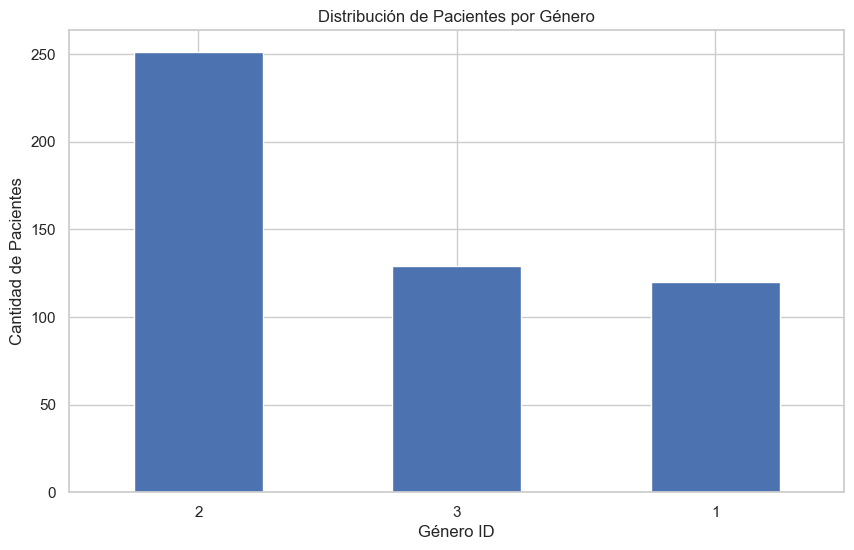

In [29]:
# Análisis de la tabla de pacientes si existe
if 'PATI_PATIENTS' in tables:
    # Obtener datos de pacientes
    query = "SELECT * FROM PATI_PATIENTS LIMIT 1000"  # Limitamos para no cargar demasiados datos
    patients_df = pd.read_sql_query(query, conn)
    
    print(f"Muestra de {len(patients_df)} pacientes:")
    print(patients_df.head())
    
    # Resumen estadístico
    print("\nResumen estadístico de datos numéricos:")
    print(patients_df.describe())
    
    # Análisis de género si existe la columna
    if 'GEND_ID' in patients_df.columns:
        print("\nDistribución por género:")
        gender_counts = patients_df['GEND_ID'].value_counts()
        print(gender_counts)
        
        # Visualización de distribución de género
        plt.figure(figsize=(10, 6))
        gender_counts.plot(kind='bar')
        plt.title('Distribución de Pacientes por Género')
        plt.xlabel('Género ID')
        plt.ylabel('Cantidad de Pacientes')
        plt.xticks(rotation=0)
        plt.show()
else:
    print("La tabla PATI_PATIENTS no existe en la base de datos")

## Análisis de Histologías y Tipos de Tumores

Vamos a analizar las tablas relacionadas con histologías y tipos de tumores

In [30]:
# Función para obtener datos de una tabla
def get_table_data(conn, table_name):
    try:
        query = f"SELECT * FROM {table_name}"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error al obtener datos de {table_name}: {e}")
        return pd.DataFrame()

# Analizar tipos de tumores si existe la tabla
tumor_tables = [t for t in tables if 'TUMOR' in t]
print(f"Tablas relacionadas con tumores: {tumor_tables}")

for table in tumor_tables:
    df = get_table_data(conn, table)
    if not df.empty:
        print(f"\nContenido de la tabla {table} ({len(df)} registros):")
        print(df.head())
        
        # Si hay una columna de descripción, mostrar valores únicos
        desc_cols = [col for col in df.columns if 'DESCRIPTION' in col]
        if desc_cols:
            print(f"\nValores únicos en {desc_cols[0]}:")
            unique_values = df[desc_cols[0]].unique()
            for i, value in enumerate(unique_values[:20], 1):  # Limitamos a 20 valores
                print(f"{i}. {value}")
            if len(unique_values) > 20:
                print(f"... y {len(unique_values) - 20} más")

Tablas relacionadas con tumores: ['ONCO_TUMOR_FOCALITIES', 'ONCO_TUMOR_LATERALITY_TYPES', 'ONCO_TUMOR_LOCALIZATIONS', 'ONCO_TUMOR_MARKERS', 'ONCO_TUMOR_PHASES']

Contenido de la tabla ONCO_TUMOR_FOCALITIES (2 registros):
   TUFO_ID TUFO_DESCRIPTION_ES                       MTIME
0        1            Unifocal  2000-11-30 23:30:55.123456
1        2          Multifocal  2000-11-30 23:30:55.123456

Valores únicos en TUFO_DESCRIPTION_ES:
1. Unifocal
2. Multifocal

Contenido de la tabla ONCO_TUMOR_LATERALITY_TYPES (3 registros):
   TULT_ID  TULT_DELETED TULT_CODE TULT_DESCRIPTION_ES  \
0        1             0   TULT-01             Derecha   
1        2             0   TULT-02           Izquierda   
2        3             0   TULT-03               Ambos   

                        MTIME  
0  2000-11-30 23:30:55.123456  
1  2000-11-30 23:30:55.123456  
2  2000-11-30 23:30:55.123456  

Valores únicos en TULT_DESCRIPTION_ES:
1. Derecha
2. Izquierda
3. Ambos

Contenido de la tabla ONCO_TUMOR_LO

## Relaciones entre Tablas

Vamos a analizar las posibles relaciones entre tablas basándonos en nombres de columnas comunes

In [31]:
# Identificar posibles relaciones entre tablas
table_columns = {}
foreign_keys = {}

for table in tables:
    schema = get_table_schema(conn, table)
    columns = [col[1] for col in schema]
    table_columns[table] = columns
    
    # Buscar posibles claves foráneas (columnas que terminan en _ID)
    for col in columns:
        if col.endswith('_ID') and col != f"{table.replace('ONCO_', '').replace('PARA_', '')}_ID":
            if col not in foreign_keys:
                foreign_keys[col] = []
            foreign_keys[col].append(table)

# Mostrar las columnas que podrían ser claves foráneas
print("Posibles relaciones entre tablas:")
for fk, tables_list in sorted(foreign_keys.items(), key=lambda x: len(x[1]), reverse=True)[:15]:
    if len(tables_list) > 1:
        print(f"\nLa columna {fk} aparece en {len(tables_list)} tablas:")
        for t in tables_list:
            print(f"  - {t}")

Posibles relaciones entre tablas:

La columna PATI_ID aparece en 33 tablas:
  - APPO_APPOINTMENTS
  - APPO_PERIODICS
  - APPO_PROPOSALS
  - APPR_TREATMENTS
  - BEDS_BEDS
  - CLIP_CLINICAL_PROCESSES
  - DOCS_DOCUMENTS
  - EPIS_DIAGNOSTICS
  - EPIS_EPISODES
  - EPIS_PROCEDURES
  - HEAL_DIABETES_INDICATORS
  - HEAL_HYPERTENS_INDICATORS
  - HIST_ANDROLOGICALS
  - HIST_GYNECOBSTETRICS
  - HIST_HISTORY_DIAG_PROC
  - HIST_PEDIATRICS
  - HIST_SOCIOECONOMICS
  - HIST_TOXIC_HABITS
  - INTE_EXTERNAL_ACTIVITY
  - ONCO_CANCERS
  - ONCO_FAMILIAR_HISTORY
  - PATI_ORIGIN_PROFESSIONALS
  - PATI_PATIENTS
  - PATI_PATIENT_ADDRESSES
  - PATI_PATIENT_ALLERGIES
  - PATI_PATIENT_CONTACTS
  - PATI_PATIENT_CONTACT_PERSONS
  - PATI_PATIENT_HEALTH_IDS
  - PATI_PATIENT_IDENTIFICATIONS
  - PATI_PATIENT_PHONES
  - PATI_USUAL_MEDICATION
  - PROC_PROCEDURES
  - VACC_VACCINES

La columna CDTE_ID aparece en 6 tablas:
  - APPO_PROPOSALS
  - APPR_TREATMENTS
  - EPIS_DIAGNOSTICS
  - HIST_HISTORY_DIAG_PROC
  - ONCO_CANCERS

## Análisis Detallado de las Relaciones entre Tablas

Para entender mejor la estructura de la base de datos con sus 236 tablas, vamos a realizar un análisis más profundo de las relaciones entre ellas. Usaremos diferentes técnicas:

1. Análisis de claves foráneas
2. Visualización de relaciones
3. Agrupación de tablas por prefijo
4. Identificación de relaciones complejas

Análisis de subsistemas por prefijo de tablas:

ONCO: 35 tablas
  - ONCO_BIOPSY_TYPES
  - ONCO_CANCERS
  - ONCO_CLINICAL_STATUS
  - ONCO_DIFFERENTIATION_STAGES
  - ONCO_DISEASE_STATES
  - ... y 30 tablas más

APPO: 26 tablas
  - APPO_ABSENT_REASONS
  - APPO_ADMISSION_PREFERENCES
  - APPO_ADMISSION_TYPES
  - APPO_AMBI_STATES
  - APPO_APPOINTMENTS
  - ... y 21 tablas más

APPR: 15 tablas
  - APPR_ANESTHESIA_STATES
  - APPR_CLIN_HIST_CANCEL_REASONS
  - APPR_CLIN_HIST_FILE_CATEGORIES
  - APPR_CLIN_HIST_FILE_PRIORITIES
  - APPR_CLIN_HIST_FILE_REASONS
  - ... y 10 tablas más

CURE: 14 tablas
  - CURE_BED_VALUATIONS
  - CURE_CLEAN_TYPES
  - CURE_DEBRIDEMENT_TYPES
  - CURE_DISINFECTION_TYPES
  - CURE_DRAINAGE_TYPES
  - ... y 9 tablas más

EPIS: 14 tablas
  - EPIS_ADMIN_DISCHARGE_REASONS
  - EPIS_AMBI_STATES
  - EPIS_DESTINATIONS
  - EPIS_DIAGNOSTICS
  - EPIS_DIET_SHIFTS
  - ... y 9 tablas más

HIST: 14 tablas
  - HIST_ALCOHOL_TYPES
  - HIST_ANDROLOGICALS
  - HIST_BIRTH_TYPES
  - HIST_CONTRACEP

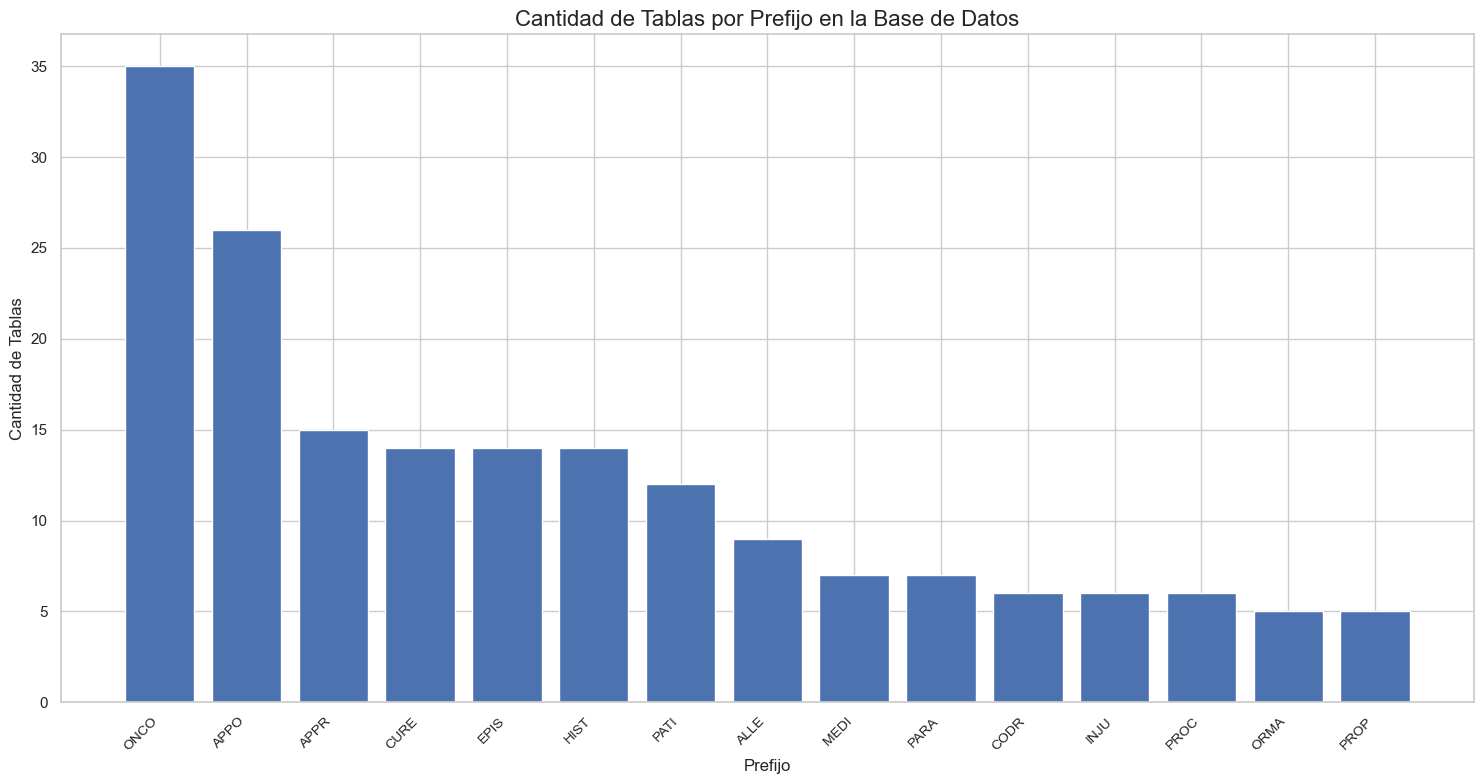

In [33]:
# Análisis por prefijo de tablas para identificar subsistemas
prefijos = {}
for tabla in tables:
    prefijo = tabla.split('_')[0] if '_' in tabla else 'OTROS'
    if prefijo not in prefijos:
        prefijos[prefijo] = []
    prefijos[prefijo].append(tabla)

# Ordenar por cantidad de tablas
prefijos_sorted = sorted(prefijos.items(), key=lambda x: len(x[1]), reverse=True)

print("Análisis de subsistemas por prefijo de tablas:")
for prefijo, tablas in prefijos_sorted:
    print(f"\n{prefijo}: {len(tablas)} tablas")
    # Mostrar las primeras 5 tablas de cada prefijo
    for t in tablas[:5]:
        print(f"  - {t}")
    if len(tablas) > 5:
        print(f"  - ... y {len(tablas) - 5} tablas más")
        
# Crear un gráfico de barras para visualizar la distribución
plt.figure(figsize=(15, 8))
prefijosx = [p[0] for p in prefijos_sorted[:15]]  # Tomar los 15 prefijos más comunes
cantidades = [len(p[1]) for p in prefijos_sorted[:15]]

plt.bar(prefijosx, cantidades)
plt.title('Cantidad de Tablas por Prefijo en la Base de Datos', fontsize=16)
plt.xlabel('Prefijo', fontsize=12)
plt.ylabel('Cantidad de Tablas', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

### Análisis Detallado de Claves Foráneas

Vamos a mejorar nuestro análisis de claves foráneas para identificar mejor las relaciones entre tablas.

In [34]:
# Mejorar la detección de claves foráneas
def detectar_claves_foraneas(conn, tables):
    # Diccionario para almacenar las claves primarias de cada tabla
    primary_keys = {}
    # Diccionario para almacenar posibles claves foráneas
    foreign_keys = {}
    
    # Identificar todas las claves primarias
    for table in tables:
        schema = get_table_schema(conn, table)
        for col in schema:
            # El índice 1 es el nombre de la columna y el 5 indica si es clave primaria (1 si lo es)
            if col[5] == 1:
                primary_keys[col[1]] = table
    
    # Buscar posibles claves foráneas
    for table in tables:
        schema = get_table_schema(conn, table)
        for col in schema:
            col_name = col[1]
            # Si termina en _ID pero no es clave primaria de esta tabla
            if col_name.endswith('_ID') and col[5] != 1:
                # Si coincide con una clave primaria conocida o sigue el patrón de nombre
                if col_name in primary_keys or col_name.replace('_ID', '') in [t.replace('_', '') for t in tables]:
                    if col_name not in foreign_keys:
                        foreign_keys[col_name] = []
                    foreign_keys[col_name].append(table)
    
    return primary_keys, foreign_keys

# Ejecutar la detección mejorada
primary_keys, foreign_keys = detectar_claves_foraneas(conn, tables)

print(f"Se encontraron {len(primary_keys)} claves primarias y {len(foreign_keys)} posibles claves foráneas")

# Mostrar las claves foráneas más utilizadas
print("\nLas 20 claves foráneas más utilizadas:")
for fk, tables_list in sorted(foreign_keys.items(), key=lambda x: len(x[1]), reverse=True)[:20]:
    print(f"\n{fk} ({len(tables_list)} tablas):")
    for t in tables_list[:5]:  # Mostrar solo las primeras 5 tablas
        print(f"  - {t}")
    if len(tables_list) > 5:
        print(f"  - ... y {len(tables_list) - 5} tablas más")

# Encontrar relaciones muchos a muchos (tablas que contienen dos o más claves foráneas)
print("\nPosibles tablas de relación muchos a muchos:")
relationship_tables = {}

for table in tables:
    fk_columns = []
    schema = get_table_schema(conn, table)
    for col in schema:
        col_name = col[1]
        if col_name in foreign_keys and col_name != table.replace('_', '') + '_ID':
            fk_columns.append(col_name)
    
    if len(fk_columns) >= 2:
        relationship_tables[table] = fk_columns

# Mostrar las tablas de relación encontradas
for table, fks in list(relationship_tables.items())[:10]:
    print(f"\n{table} relaciona: {', '.join(fks)}")

Se encontraron 234 claves primarias y 105 posibles claves foráneas

Las 20 claves foráneas más utilizadas:

PATI_ID (32 tablas):
  - APPO_APPOINTMENTS
  - APPO_PERIODICS
  - APPO_PROPOSALS
  - APPR_TREATMENTS
  - BEDS_BEDS
  - ... y 27 tablas más

ALSE_ID (4 tablas):
  - ALLE_INTOLERANCES
  - ALLE_L2_NOT_MED_ALLERGENS
  - ALLE_NOT_MEDICINAL_ALLERGENS
  - PATI_PATIENT_ALLERGIES

APPR_ID (4 tablas):
  - APPO_APPOINTMENTS
  - APPO_PERIODICS
  - DOCS_DOCUMENTS
  - PROC_PROCEDURES

EPIS_ID (4 tablas):
  - APPO_PERIODICS
  - DOCS_DOCUMENTS
  - EPIS_DIAGNOSTICS
  - EPIS_PROCEDURES

PPTY_ID (4 tablas):
  - APPO_PROPOSALS
  - APPO_PROPOSAL_TYPE_STATES
  - PROP_TYPE_SAMPLE_TYPES
  - TEST_TEST_TYPES

PROC_ID (4 tablas):
  - EPIS_DIAGNOSTICS
  - EPIS_PROCEDURES
  - HEAL_DIABETES_INDICATORS
  - HEAL_HYPERTENS_INDICATORS

PRRE_ID (3 tablas):
  - APPO_APPOINTMENTS
  - APPO_PROPOSALS
  - EPIS_EPISODES

CLIP_ID (3 tablas):
  - EPIS_DIAGNOSTICS
  - EPIS_EPISODES
  - ONCO_CANCERS

NMAL_ID (2 tablas):
  -

### Visualización de Relaciones entre Tablas

Vamos a crear un grafo visual de las relaciones entre las tablas principales para entender mejor la estructura.

C:\Users\cpascual\AppData\Local\Temp\ipykernel_10908\1348825045.py:51: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


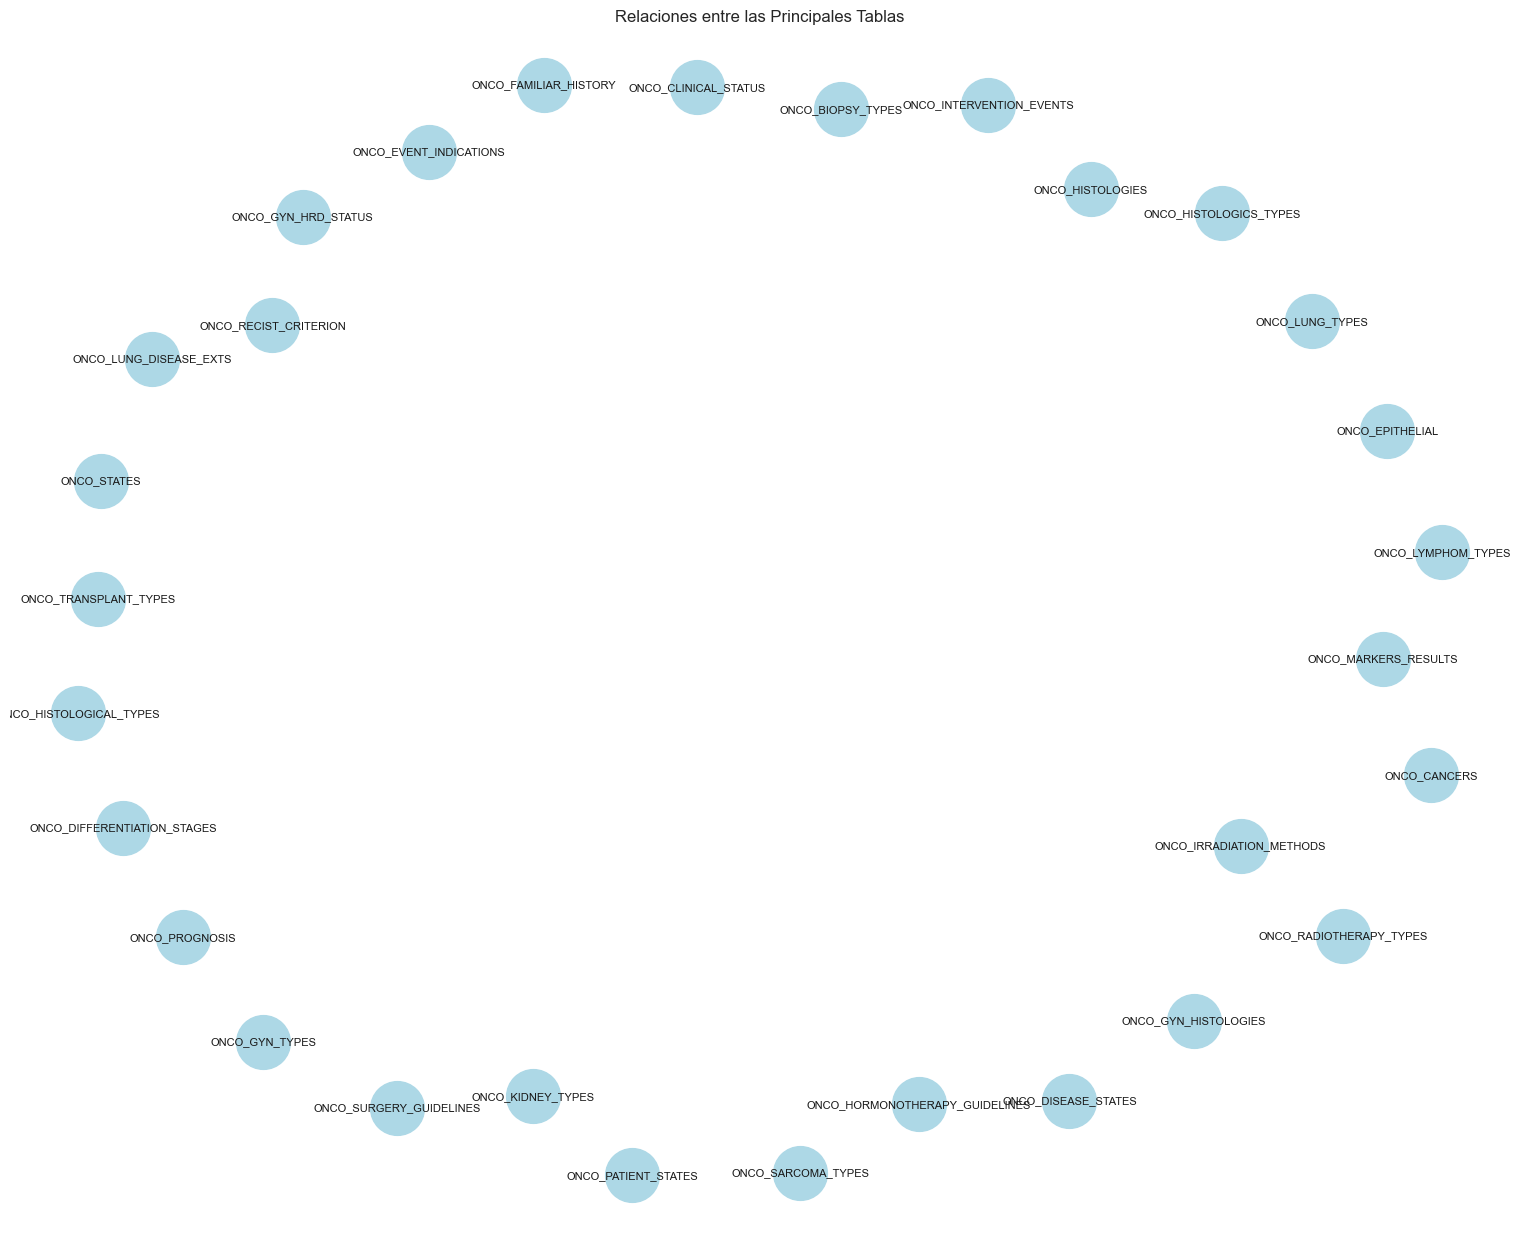

In [35]:
# Instalar networkx si no está disponible
try:
    import networkx as nx
except ImportError:
    print("Instalando networkx...")
    !pip install networkx
    import networkx as nx

# Crear un grafo de relaciones entre tablas
G = nx.DiGraph()

# Añadir nodos (tablas)
# Para simplificar, solo añadiremos las tablas más importantes
importantes_prefijos = ['ONCO', 'PATI', 'APPO', 'EPIS']
tablas_importantes = []

for prefijo in importantes_prefijos:
    tablas_importantes.extend([t for t in tables if t.startswith(f"{prefijo}_")])

# Limitar a 30 tablas para visualización
if len(tablas_importantes) > 30:
    tablas_importantes = tablas_importantes[:30]

for tabla in tablas_importantes:
    G.add_node(tabla)

# Añadir bordes (relaciones)
for tabla in tablas_importantes:
    schema = get_table_schema(conn, tabla)
    for col in schema:
        col_name = col[1]
        if col_name in foreign_keys and col_name != tabla.replace('_', '') + '_ID':
            # Encontrar tabla objetivo si existe
            for target_tabla in tablas_importantes:
                if target_tabla.replace('_', '') + '_ID' == col_name:
                    G.add_edge(tabla, target_tabla, name=col_name)
                    break

# Dibujar el grafo
plt.figure(figsize=(15, 12))
pos = nx.spring_layout(G, k=0.9)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, font_size=8, arrows=True, 
        connectionstyle='arc3,rad=0.1')

# Añadir etiquetas a los bordes
edge_labels = {(u, v): d['name'] for u, v, d in G.edges(data=True) if 'name' in d}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7)

plt.title("Relaciones entre las Principales Tablas")
plt.tight_layout()
plt.axis('off')
plt.show()

### Análisis Estadístico Detallado de las Tablas

Vamos a examinar las estadísticas detalladas de cada tabla, incluyendo:
- Tipos de datos por columna
- Cantidad de valores NULL
- Distribuciones de valores
- Campos de fecha y su rango

In [36]:
# Función para realizar un análisis detallado de una tabla
def analizar_tabla_detallada(conn, tabla):
    try:
        # Obtener los datos de la tabla
        df = get_table_data(conn, tabla)
        if df.empty:
            return {
                "registros": 0,
                "columnas": 0,
                "mensaje": "Tabla vacía"
            }
        
        # Estadísticas básicas
        stats = {
            "registros": len(df),
            "columnas": len(df.columns),
            "tipos_datos": {col: str(df[col].dtype) for col in df.columns},
            "valores_null": {col: df[col].isnull().sum() for col in df.columns},
            "valores_unicos": {col: df[col].nunique() for col in df.columns},
        }
        
        # Analizar columnas de fecha
        date_columns = []
        for col in df.columns:
            if 'DATE' in col.upper() or 'TIME' in col.upper():
                date_columns.append(col)
                
        if date_columns:
            stats["columnas_fecha"] = date_columns
            
        return stats
    except Exception as e:
        return {
            "error": str(e)
        }

# Seleccionar algunas tablas importantes para análisis detallado
# Elegir tablas con mayor cantidad de registros
top_tablas = table_counts_df.head(10).index.tolist()

# Añadir algunas tablas de diferentes prefijos si no están ya
prefijos_importantes = ['ONCO', 'PATI', 'EPIS']
for prefijo in prefijos_importantes:
    prefijo_tablas = [t for t in tables if t.startswith(f"{prefijo}_")]
    if prefijo_tablas:
        # Elegir la tabla con más registros de este prefijo
        prefijo_tabla = max(prefijo_tablas, key=lambda t: table_counts.get(t, 0))
        if prefijo_tabla not in top_tablas:
            top_tablas.append(prefijo_tabla)

# Realizar análisis detallado
print("Análisis detallado de tablas importantes:")
for tabla in top_tablas:
    print(f"\n{'-'*50}")
    print(f"Tabla: {tabla} ({table_counts.get(tabla, 'desconocido')} registros)")
    stats = analizar_tabla_detallada(conn, tabla)
    
    # Mostrar estadísticas
    for key, value in stats.items():
        if key == "tipos_datos":
            print(f"\nTipos de datos:")
            for col, tipo in value.items():
                print(f"  - {col}: {tipo}")
        elif key == "valores_null":
            print(f"\nValores NULL:")
            for col, num in value.items():
                if num > 0:
                    print(f"  - {col}: {num} ({num/stats['registros']*100:.1f}%)")
        elif key == "valores_unicos":
            print(f"\nValores únicos:")
            for col, num in value.items():
                print(f"  - {col}: {num}")
        elif key == "columnas_fecha":
            print(f"\nColumnas de fecha/tiempo: {', '.join(value)}")
        elif key not in ["registros", "columnas"]:
            print(f"\n{key}: {value}")

Análisis detallado de tablas importantes:

--------------------------------------------------
Tabla: _DICTIONARIES (86003 registros)

Tipos de datos:
  - COLUMN: object
  - KEY: int64
  - VAL: object

Valores NULL:

Valores únicos:
  - COLUMN: 201
  - KEY: 44500
  - VAL: 79318

--------------------------------------------------
Tabla: MEDI_MEDICATIONS (37889 registros)

Tipos de datos:
  - COLUMN: object
  - KEY: int64
  - VAL: object

Valores NULL:

Valores únicos:
  - COLUMN: 201
  - KEY: 44500
  - VAL: 79318

--------------------------------------------------
Tabla: MEDI_MEDICATIONS (37889 registros)

Tipos de datos:
  - MEDI_ID: int64
  - PHTH_ID: float64
  - MEDI_CODE: object
  - MEDI_FLUID: int64
  - MEDI_ORDER: int64
  - MEDI_DELETED: int64
  - MEDI_DESCRIPTION_ES: object
  - PFOR_ID: float64
  - MELA_ID: float64
  - MEDI_DOSE: float64
  - MEUN_ID_DOSE: float64
  - MEUN_ID_VOLUME: float64
  - MEDI_MULTIDOSE: int64
  - MEDI_CREATED_DATE: object
  - MTIME: object

Valores NULL:
  

### Consultas de Ejemplo para Demostrar Relaciones

Vamos a hacer algunas consultas SQL que unen diferentes tablas para mostrar cómo están relacionadas y qué información se puede extraer.

In [37]:
# Función para ejecutar consultas SQL y mostrar los resultados
def ejecutar_consulta(conn, query, limit=10):
    try:
        df = pd.read_sql_query(query, conn)
        print(f"La consulta devolvió {len(df)} filas. Mostrando las primeras {limit}:")
        return df.head(limit)
    except Exception as e:
        print(f"Error al ejecutar la consulta: {e}")
        return None

# Consultas de ejemplo 

# 1. Datos de pacientes con su género
print("\nConsulta 1: Pacientes con información de género")
q1 = """
SELECT p.PATI_ID, p.PATI_NAME, p.PATI_SURNAME_1, g.GEND_DESCRIPTION_ES 
FROM PATI_PATIENTS p
LEFT JOIN PARA_GENDERS g ON p.GEND_ID = g.GEND_ID
LIMIT 10
"""
resultado1 = ejecutar_consulta(conn, q1)
display(resultado1)

# 2. Citas médicas con información del paciente
print("\nConsulta 2: Citas médicas con información del paciente")
q2 = """
SELECT a.APPO_ID, a.APPO_START_DATE, p.PATI_NAME, p.PATI_SURNAME_1, s.STAT_DESCRIPTION_ES
FROM APPO_APPOINTMENTS a
JOIN PATI_PATIENTS p ON a.PATI_ID = p.PATI_ID
LEFT JOIN APPO_STATES s ON a.STAT_ID = s.STAT_ID
LIMIT 10
"""
resultado2 = ejecutar_consulta(conn, q2)
display(resultado2)

# 3. Consulta relacionada con oncología
print("\nConsulta 3: Información oncológica de pacientes")
q3 = """
SELECT p.PATI_ID, p.PATI_NAME, p.PATI_SURNAME_1, t.TULO_DESCRIPTION_ES
FROM PATI_PATIENTS p
JOIN ONCO_CANCERS c ON p.PATI_ID = c.PATI_ID
JOIN ONCO_TUMOR_LOCALIZATIONS t ON c.TULO_ID = t.TULO_ID
LIMIT 10
"""
try:
    resultado3 = ejecutar_consulta(conn, q3)
    display(resultado3)
except:
    print("La consulta 3 no pudo ejecutarse. Probablemente no existen las relaciones necesarias.")

# 4. Explorar las relaciones entre tablas de diferentes sistemas
print("\nConsulta 4: Interrelaciones entre sistemas")
q4 = """
SELECT COUNT(*) as total_relaciones, 
    (SELECT COUNT(*) FROM PATI_PATIENTS) as total_pacientes,
    (SELECT COUNT(*) FROM APPO_APPOINTMENTS) as total_citas,
    (SELECT COUNT(*) FROM ONCO_CANCERS) as total_casos_cancer
"""
resultado4 = ejecutar_consulta(conn, q4)
display(resultado4)


Consulta 1: Pacientes con información de género
La consulta devolvió 10 filas. Mostrando las primeras 10:


,PATI_ID,PATI_NAME,PATI_SURNAME_1,GEND_DESCRIPTION_ES
0,1001,PILAR,PRUEBAS100996,Femenino
1,1002,MARIA DOLORES,PRUEBAS100997,Indeterminado
2,1005,OSCAR LUIS,PRUEBAS101000,Indeterminado
3,1006,ANDRES,PRUEBAS101001,Indeterminado
4,1010,ULRIKE,PRUEBAS101005,Femenino
5,1013,CARMEN,PRUEBAS101008,Masculino
6,1018,SONIA MERCEDES,PRUEBAS101013,Femenino
7,1021,GIUSEPPE,PRUEBAS101016,Femenino
8,1026,WANDA GERTRUD,PRUEBAS101021,Femenino
9,1027,MARGARITA AMPARO,PRUEBAS101022,Indeterminado



Consulta 2: Citas médicas con información del paciente
La consulta devolvió 10 filas. Mostrando las primeras 10:


,APPO_ID,APPO_START_DATE,PATI_NAME,PATI_SURNAME_1,STAT_DESCRIPTION_ES
0,294,2020-06-10 13:30:00,ALBERTO,PRUEBAS103044,Cancelada
1,328,2020-06-11 12:30:00,CELIA,PRUEBAS103695,Atendido
2,389,2020-06-11 13:00:00,YVONNE,PRUEBAS103948,Atendido
3,671,2020-06-18 12:30:00,ALBERTO,PRUEBAS103044,Atendido
4,737,2020-06-16 14:30:00,DANIEL,PRUEBAS101992,Cancelada
5,741,2020-06-17 13:10:00,CELIA,PRUEBAS103695,Cancelada
6,749,2020-12-28 11:00:00,YVONNE,PRUEBAS103948,Atendido
7,750,2020-12-28 11:15:00,YVONNE,PRUEBAS103948,Atendido
8,877,2020-06-17 13:40:00,MARGARITA AMPARO,PRUEBAS101022,Cancelada
9,890,2020-06-15 10:30:00,MARIA CARMEN,PRUEBAS104630,Atendido



Consulta 3: Información oncológica de pacientes
La consulta devolvió 0 filas. Mostrando las primeras 10:


,PATI_ID,PATI_NAME,PATI_SURNAME_1,TULO_DESCRIPTION_ES



Consulta 4: Interrelaciones entre sistemas
La consulta devolvió 1 filas. Mostrando las primeras 10:


,total_relaciones,total_pacientes,total_citas,total_casos_cancer
0,1,500,11080,0


### Búsqueda de Patrones en los Nombres de Campos

Analizaremos patrones comunes en los nombres de campos para identificar convenciones y posibles relaciones implícitas.

Total de columnas en la base de datos: 1307

Patrones comunes en nombres de columnas:
PATI: 53 columnas
CANC: 26 columnas
EPIS: 20 columnas
HIGY: 17 columnas
APPR: 15 columnas
PROC: 15 columnas
HIPE: 13 columnas
MEDI: 11 columnas
HIDI: 10 columnas
APPO: 9 columnas
ADPA: 9 columnas
CDTE: 8 columnas
DIAG: 8 columnas
ALSE: 7 columnas
PPTY: 7 columnas
BEDS: 7 columnas
CLIP: 7 columnas
BLGR: 7 columnas
PRRE: 6 columnas
PRIO: 6 columnas

Distribución de tipos de datos:
Tipo
nvarchar     329
datetime2    262
bit          218
tinyint      215
bigint       101
INT           94
smallint      61
date          16
varchar        9
float          2
Name: count, dtype: int64


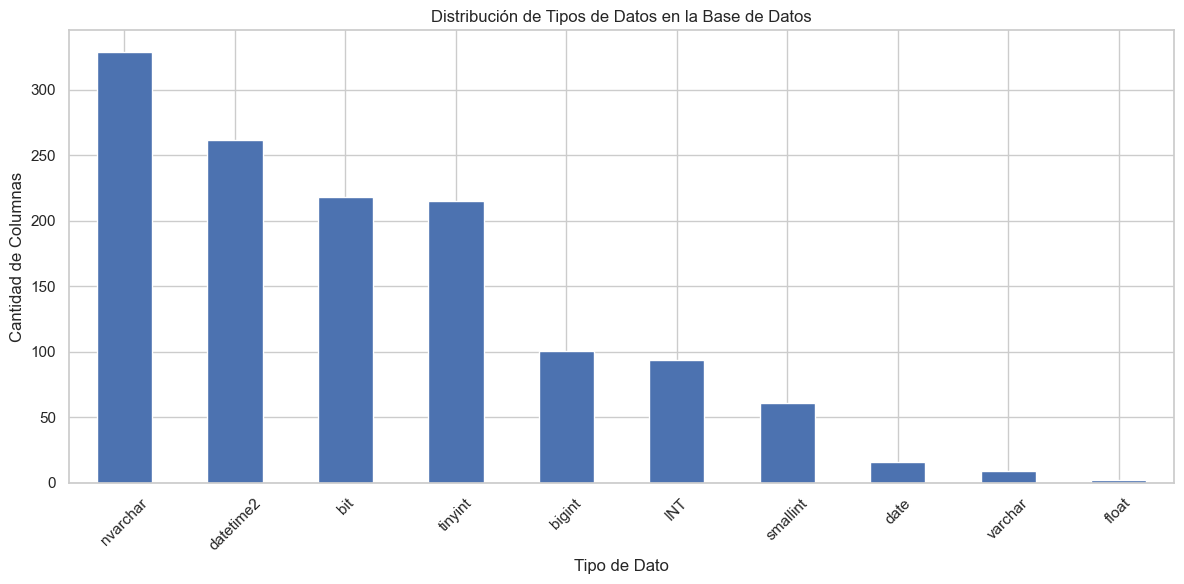

In [38]:
# Recopilar todos los nombres de columnas de todas las tablas
all_columns = []
for table in tables:
    schema = get_table_schema(conn, table)
    for col in schema:
        all_columns.append((table, col[1], col[2]))  # tabla, nombre_columna, tipo_dato

# Crear un DataFrame con la información
columns_df = pd.DataFrame(all_columns, columns=['Tabla', 'Columna', 'Tipo'])

# Análisis de patrones en nombres de columnas
print(f"Total de columnas en la base de datos: {len(columns_df)}")

# Patrones comunes en nombres de columnas
print("\nPatrones comunes en nombres de columnas:")
column_patterns = {}
for col in columns_df['Columna']:
    parts = col.split('_')
    if len(parts) > 1:
        prefix = parts[0]
        if prefix not in column_patterns:
            column_patterns[prefix] = 0
        column_patterns[prefix] += 1

# Mostrar los 20 prefijos más comunes
for prefix, count in sorted(column_patterns.items(), key=lambda x: x[1], reverse=True)[:20]:
    print(f"{prefix}: {count} columnas")

# Análisis de tipos de datos
print("\nDistribución de tipos de datos:")
type_counts = columns_df['Tipo'].value_counts()
print(type_counts)

# Visualizar distribución de tipos de datos
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar')
plt.title('Distribución de Tipos de Datos en la Base de Datos')
plt.xlabel('Tipo de Dato')
plt.ylabel('Cantidad de Columnas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Resumen Completo de la Base de Datos

Con base en el análisis realizado, ahora podemos proporcionar un resumen completo de la estructura de la base de datos y sus principales características.

In [39]:
# Crear un resumen general de la base de datos
print("RESUMEN DE LA BASE DE DATOS")
print("="*50)

print(f"\nTotal de tablas: {len(tables)}")
print(f"Total de columnas: {len(columns_df)}")
print(f"Tablas con más registros: {', '.join(table_counts_df.head(5).index.tolist())}")

# Subsistemas principales (por prefijo)
print("\nSubsistemas principales:")
for prefijo, tablas in prefijos_sorted[:7]:
    print(f"- {prefijo}: {len(tablas)} tablas")

# Tablas centrales con más relaciones
print("\nTablas centrales (con más relaciones):")
tablas_por_relaciones = {}
for tabla in tables:
    relaciones = 0
    for fk_tables in foreign_keys.values():
        if tabla in fk_tables:
            relaciones += 1
    tablas_por_relaciones[tabla] = relaciones

for tabla, relaciones in sorted(tablas_por_relaciones.items(), key=lambda x: x[1], reverse=True)[:10]:
    print(f"- {tabla}: {relaciones} relaciones")

# Conclusiones sobre la estructura de la base de datos
print("\nCONCLUSIONES:")
print("1. La base de datos parece ser un sistema de gestión clínica/hospitalaria con énfasis en oncología")
print("2. Tiene múltiples subsistemas interconectados para gestionar pacientes, citas y procesos médicos")
print("3. Las entidades principales son pacientes (PATI), citas médicas (APPO), y datos oncológicos (ONCO)")
print("4. Los datos están bien estructurados con convenciones de nomenclatura consistentes")

# Sugerencia de próximos pasos
print("\nPRÓXIMOS PASOS PARA ANÁLISIS ADICIONAL:")
print("1. Explorar en detalle los datos de pacientes y su distribución demográfica")
print("2. Analizar la evolución temporal de citas y procedimientos médicos")
print("3. Estudiar las relaciones entre diagnósticos oncológicos y tratamientos")
print("4. Buscar patrones en las historias clínicas para identificar factores de riesgo")

RESUMEN DE LA BASE DE DATOS

Total de tablas: 236
Total de columnas: 1307
Tablas con más registros: _DICTIONARIES, MEDI_MEDICATIONS, ARTI_ARTICLES, PROC_PROCEDURES, APPO_PROPOSALS

Subsistemas principales:
- ONCO: 35 tablas
- APPO: 26 tablas
- APPR: 15 tablas
- CURE: 14 tablas
- EPIS: 14 tablas
- HIST: 14 tablas
- PATI: 12 tablas

Tablas centrales (con más relaciones):
- ONCO_CANCERS: 19 relaciones
- APPO_PROPOSALS: 17 relaciones
- PATI_PATIENT_ALLERGIES: 14 relaciones
- APPO_APPOINTMENTS: 12 relaciones
- EPIS_EPISODES: 9 relaciones
- EPIS_DIAGNOSTICS: 7 relaciones
- APPR_TREATMENTS: 6 relaciones
- APPO_PERIODICS: 5 relaciones
- EPIS_PROCEDURES: 5 relaciones
- HEAL_DIABETES_INDICATORS: 5 relaciones

CONCLUSIONES:
1. La base de datos parece ser un sistema de gestión clínica/hospitalaria con énfasis en oncología
2. Tiene múltiples subsistemas interconectados para gestionar pacientes, citas y procesos médicos
3. Las entidades principales son pacientes (PATI), citas médicas (APPO), y datos

## Análisis de Datos de Historia Familiar Oncológica

Si existe la tabla ONCO_FAMILIAR_HISTORY, la analizaremos con más detalle

In [32]:
# Análisis de historia familiar oncológica
if 'ONCO_FAMILIAR_HISTORY' in tables:
    history_df = get_table_data(conn, 'ONCO_FAMILIAR_HISTORY')
    if not history_df.empty:
        print(f"Análisis de historia familiar oncológica ({len(history_df)} registros):")
        print(history_df.head())
        
        # Estadísticas por edad de diagnóstico
        if 'ONFH_DIAGNOSTIC_AGE' in history_df.columns:
            print("\nEstadísticas de edad de diagnóstico:")
            print(history_df['ONFH_DIAGNOSTIC_AGE'].describe())
            
            # Visualizar distribución de edades de diagnóstico
            plt.figure(figsize=(12, 6))
            sns.histplot(data=history_df, x='ONFH_DIAGNOSTIC_AGE', kde=True, bins=30)
            plt.title('Distribución de Edades de Diagnóstico en Historia Familiar')
            plt.xlabel('Edad de Diagnóstico')
            plt.ylabel('Frecuencia')
            plt.show()
            
            # Análisis por tipo de relación si existe la columna
            if 'RETY_ID' in history_df.columns:
                print("\nDiagnósticos por tipo de relación:")
                relation_counts = history_df['RETY_ID'].value_counts()
                print(relation_counts)
                
                # Visualización
                plt.figure(figsize=(10, 6))
                relation_counts.plot(kind='bar')
                plt.title('Cantidad de Diagnósticos por Tipo de Relación')
                plt.xlabel('Tipo de Relación (ID)')
                plt.ylabel('Cantidad')
                plt.xticks(rotation=45)
                plt.show()
else:
    print("La tabla ONCO_FAMILIAR_HISTORY no existe en la base de datos")

## Resumen y Conclusiones

Este notebook ha proporcionado un análisis básico de la estructura y contenido de la base de datos oncológica. Los principales hallazgos son:

1. La base de datos contiene numerosas tablas relacionadas con oncología
2. Hay información detallada sobre pacientes, tipos de tumores e histologías
3. Se pueden analizar relaciones entre diferentes entidades
4. Los datos permiten realizar análisis estadísticos sobre diagnósticos oncológicos

Para un análisis más profundo, se podrían realizar:
- Análisis de correlación entre tipos de cáncer y características demográficas
- Estudio temporal de diagnósticos y tratamientos
- Análisis de eficacia de tratamientos

In [19]:
# Cerrar la conexión a la base de datos
conn.close()
print("Conexión cerrada. Análisis completado.")

Conexión cerrada. Análisis completado.
